# Project Summary

Provide a clear explanation of:
  1. What this project is about
     - Clearly state the ML type (supervised/unsupervised)
  2. The goal of the project
     - E.g. why it’s important, what goal you want to achieve, or want to learn.

# Data Summary

Data Source:
1. Import the Python libraries that will be used for the evaluation
2. Load dataset from source
3. Identify where the data came from (using the APA format)
4. Explain how the dataset was gathered (via API, csv, etc.)

In [98]:
# Load python libraries used for the analysis
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
# from sklearn.feature_extraction import text

import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

import heapq

In [96]:
# Load training data
raw_train_df = pd.read_csv('./BBC News Train.csv')
#raw_test_df = pd.read_csv('./BBC News Test.csv')

- Identify where the data came from (using the APA format)
- Explain how the dataset was gathered (via API, csv, etc.)

Data Description:
1. Create a table to provide a description of each feature (at least some key features if too many)
2. Print out the results of df.info() to display:
   1. Number of samples/rows and the number of features/columns
   2. Data types of each feature (or just a summary if too many features- e.g. 10 categorical, 20 numeric features)
   3. Bytesize (if a huge file)

In [ ]:
# Display first 10 rows of data in the raw_train_df
raw_train_df

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
...,...,...,...
1485,857,double eviction from big brother model caprice...,entertainment
1486,325,dj double act revamp chart show dj duo jk and ...,entertainment
1487,1590,weak dollar hits reuters revenues at media gro...,business
1488,1587,apple ipod family expands market apple has exp...,tech


In [70]:
# Check the shape of the raw_train_df dataframe
print(f'Dataset shape: Rows = {raw_train_df.shape[0]}, Columns = {raw_train_df.shape[1]}\n')

# Check the  data types of the raw_train_df dataframe
raw_train_df.info()

Dataset shape: Rows = 1490, Columns = 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ArticleId  1490 non-null   int32   
 1   Text       1490 non-null   string  
 2   Category   1490 non-null   category
dtypes: category(1), int32(1), string(1)
memory usage: 19.3 KB


In [74]:
# Display the number of unique categories in the `Category` column
unique_topics = raw_train_df['Category'].unique()
print(f'Unique Categories:\n {[cat for cat in unique_topics]}\n')

# Check for duplicated values in the ArticleId and Text columns
print(f'Count of Duplicated Values:\n  ArticleId column = {raw_train_df['ArticleId'].duplicated().sum()}\n  Text column = {raw_train_df['Text'].duplicated().sum()}\n')

Unique Categories:
 ['business', 'tech', 'politics', 'sport', 'entertainment']

Count of Duplicated Values:
  ArticleId column = 0
  Text column = 50



Univariate Visualizations (provide clear explanations of what the purpose of each visualization is):
1. Missing values table to identify:
   1. Imbalances between features
   2. Which features need to have missing data imputed or even have the feature dropped completely
2. Duplicate values heatmap to identify where rows are duplicated
3. Boxplots and/or histograms of numerical features to identify:
   1. How the distributions of each feature compare to each other
   2. Where outliers exist
4. For categorical features create a bar chart of the frequency/count of occurance for each category

<Axes: >

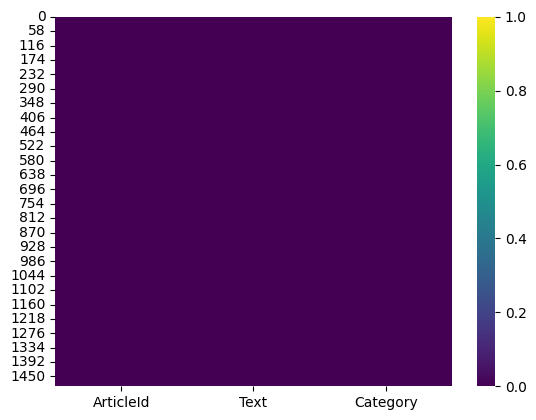

In [ ]:
# Use a heatmap to check if any values are missing.
# Missing values are labeled as True and will display as yellow in the heatmap
sns.heatmap(raw_train_df.isna(), cmap='viridis', vmin=0, vmax=1)

In [50]:
# Check for duplicate values in the `Text` column
raw_train_df[raw_train_df.duplicated(subset=['Text'], keep=False)].sort_values(by='Text')

,ArticleId,Text,Category
494,1326,ask jeeves joins web log market ask jeeves has...,tech
228,1098,ask jeeves joins web log market ask jeeves has...,tech
1430,1042,aviator creator in oscars snub the man who s...,entertainment
695,374,aviator creator in oscars snub the man who s...,entertainment
443,1847,blind student hears in colour a blind studen...,tech
...,...,...,...
1047,789,virus poses as christmas e-mail security firms...,tech
1409,957,web radio takes spanish rap global spin the ra...,tech
616,110,web radio takes spanish rap global spin the ra...,tech
63,2017,what high-definition will do to dvds first it ...,tech


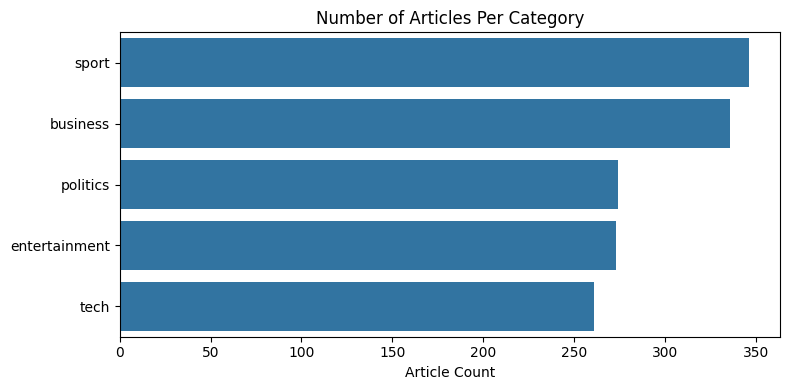

In [57]:
# Plot the number of articles per category
plt.figure(figsize=(8, 4))
sns.countplot(y='Category', data=raw_train_df, order=raw_train_df['Category'].value_counts().index)
plt.title('Number of Articles Per Category')
plt.xlabel('Article Count')
plt.ylabel(None)
plt.tight_layout()

> The bar chart shows that atricles are most often written about sports and business.

Conclusions/Discussions/Next Steps:
1. Summarize the steps taken to clean the dataset
2. Identify any insights/findings made while cleaning (including any foreseen difficulties that could occur during analysis)
3. Give a brief description of what the next step will be in the analysis (EDA)

# Data Cleaning

Data cleaning (provide clear explanations of why each step is being applied to the dataset):
1. Convert data types
2. Renaming column headers
3. Add datetime columns (year, month, day, quarter, date, etc.)
4. Add new columns (as required)
5. Pivot columns (as required)
6. Group rows by features (as required)
7. Filter/subset the dataset (as required)
8. Apply methods to remove duplicate values
9. Apply methods to imputing missing values, or drop the feature altogether if its not important to the analysis
10. Apply methods to remove outliers
11. For numerical columns:
    - Standardize / normalize columns (as required)
12. For string columns
    - Vectorize strings to create a word embedding matrix

Conclusions/Discussions/Next Steps:
1. Summarize the steps taken to clean the dataset
2. Identify any insights/findings made while cleaning (including any foreseen difficulties that could occur during analysis)
3. Give a brief description of what the next step will be in the analysis (EDA)

In [49]:
# Convert the `Text` and `Category` columns datatypes
raw_train_df = raw_train_df.astype({'Text':'string', 'Category':'category'})

# Confirm that datatypes have been converted correctly
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ArticleId  1490 non-null   int32   
 1   Text       1490 non-null   string  
 2   Category   1490 non-null   category
dtypes: category(1), int32(1), string(1)
memory usage: 19.3 KB


> The duplicate values table indicates there are 50 duplicated values in the `Text` column. The last occurance of each duplicate will be removed to reduce overfitting the model. It was shown that the original train_df dataframe contains 1,490 rows. Once the duplicate rows are removed the dataframe should contain 1,440 rows.

In [36]:
# Drop duplicate rows from the raw_train_df dataframe
train_df = raw_train_df.copy().drop_duplicates(subset='Text', keep='first')

# Confim that train_df has 1,440 rows after dropping duplicates
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1440 non-null   int64 
 1   Text       1440 non-null   object
 2   Category   1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 45.0+ KB


In [80]:
# Add word counts and character counts columns
raw_train_df['word_count'] = raw_train_df['Text'].str.split().apply(len)
raw_train_df['char_count'] = raw_train_df['Text'].str.len()

# Display summary statistics for the char_count and word_count column
raw_train_df[['word_count', 'char_count']].describe()

,word_count,char_count
count,1490.000000,1490.0
mean,385.012752,2233.461745
std,210.898616,1205.153358
min,90.000000,501.0
25%,253.000000,1453.0
50%,337.000000,1961.0
75%,468.750000,2751.25
max,3345.000000,18387.0


# EDA

Multivariate Visualizations (Using colors, size, or faceted by categories where applicable. Also provide clear explanations of what the purpose of each visualization is):
   1. Correlation matrix
   2. Bi-variate histograms (i.e. sns.pairplot())
   3. Scatter plots
   4. Line charts

Conclusions/Discussions/Next Steps:
1. Summarize the steps taken to clean the dataset
2. Identify any insights/findings made while cleaning (including any foreseen difficulties that could occur during analysis)
3. Give a brief description of what the next step will be in the analysis (Modeling)

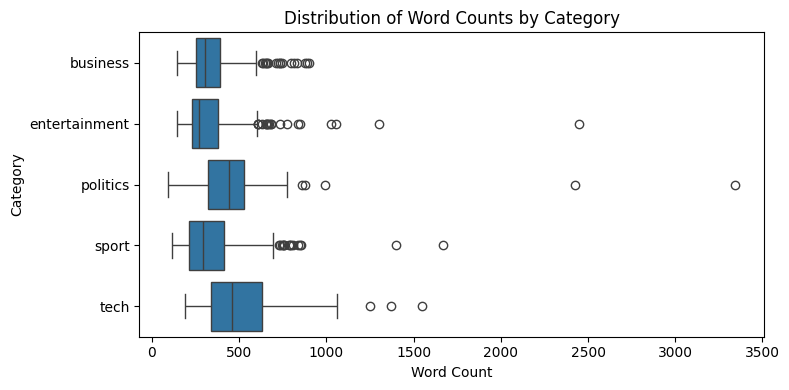

In [81]:
# Plot boxplot of word counts by category
plt.figure(figsize=(8, 4))
sns.boxplot(y='Category', x='word_count', data=raw_train_df)
plt.title('Distribution of Word Counts by Category')
plt.xlabel('Word Count')
plt.tight_layout()

> - The boxplot indicates that articles in the `tech` and `politics` categories are longer because their median word counts are higher than the median word counts for the `business`, `tech`, and `entertainment` categories.  
> -  This make sense because I can imagine that technical and political articles would be longer and more in depth than the other types of documents.

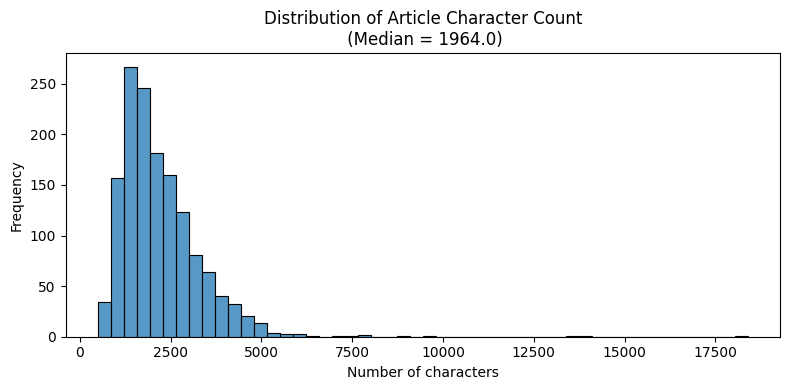

In [82]:
# Plot the article character count distribution
plt.figure(figsize=(8, 4))
sns.histplot(train_df['char_count'], bins=50)
plt.title(f'Distribution of Article Character Count\n (Median = {train_df['char_count'].median()})')
plt.xlabel('Number of characters')
plt.ylabel('Frequency')
plt.tight_layout()

### Extract Word Features Using TF-IDF

Chose TF-IDF based on this guide: https://neptune.ai/blog/vectorization-techniques-in-nlp-guide

TO DO: Briefly explain the method and how they work in your own words

In [93]:
# Create TF-IDF instance
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

# Create document-term matrix
X = vectorizer.fit_transform(train_df['Text'])

# Create the TF-IDF embedding matrix
embedding_matrix = pd.DataFrame(X[0].T.todense(), index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
embedding_matrix = embedding_matrix.sort_values('TF-IDF', ascending=False)

Text(0.5, 0, 'Frequency')

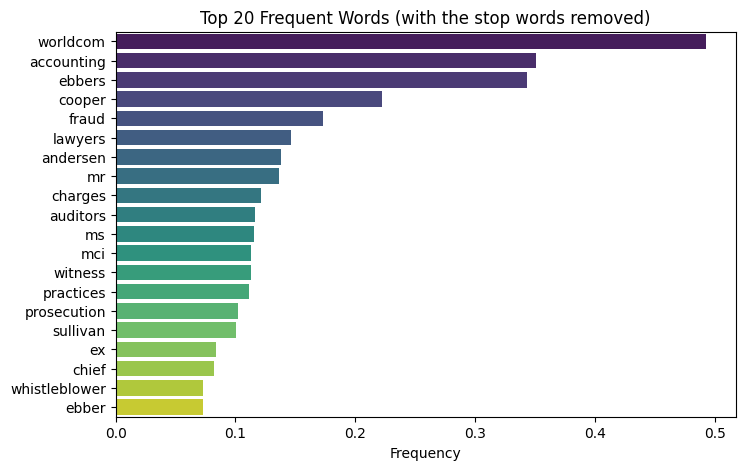

In [110]:
# Extract the top 20 most frequent wordsS
top_words = embedding_matrix.iloc[0:20,:].index.to_list()
top_words_frequencies = embedding_matrix['TF-IDF'].iloc[0:20]

# Plot the top words
plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_words_frequencies,
    y=top_words,
    hue=top_words,
    palette='viridis'
)
plt.title('Top 20 Frequent Words (with the stop words removed)')
plt.xlabel('Frequency')

# Modeling

Feature importance:
  - Investigate which features are important by looking at feature rankings or importance from the model  

Managing data imbalance using approaches like:
1. Regularization
2. cross validation
3. oversampling/undersampling/SMOTE

Check for interaction/collinearity:
  - Identify if there is interaction/collinearity between features. If there is none then state that interaction/collinearity will not be a problem for the model.
  - Is it going to be be a problem for the choice of the model?
  - Drop features to fix the interaction or collinearity

Apply various ML models to the dataset.
  - use models not covered in class
  - Ensure that the choice of model(s) is appropriate for the problem

Hyperparameter Tuning:
- Test each method below to find the best option to tune the hyperparameters:
1. Grid Search
2. Random Search
3. Bayesian Optimization

Conclusions/Discussions/Next Steps:
1. Summarize the steps taken and types of models used to model the dataset
2. Identify any insights/findings made while modelling
3. Give a brief description of what the next step will be in the analysis (Results)

In [111]:
# Create NMF model
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 206908 stored elements and shape (1440, 24456)>

# Results and Analysis

Train the model and sumamrize the results using the visualizations and metrics below:

**Regression**

*Visualizations:*
1. Training vs Validation Learning curve
2. Summary statistics
3. Residuals vs Fitted plot
4. QQ Plot
5. Scale-Location plot
6. Residuals vs Leverage plot
7. Partial regression plots

*Evaluation Metrics:* (Explain why these metrics are chosen to evaluate the model)
1. MAE
2. MSE
3. RMSE
4. R2

**Classification**  

*Visualizations:*
1. Training vs Validation Learning curve
2. Confusion matrix
3. ROC Curve

*Evaluation Metrics:* (Explain why these metrics are chosen to evaluate the model)
1. Accuracy
2. Precision
3. Recall
4. F1
5. AUC

---

Improve model performance using the techniques below. Re-create the above visualizations and sumamries. Iterate until a accurate model is created.
- Data quality and quantity  
  1. Fix labels, duplicates, and unit errors
  2. Remove leakage features created after the prediction timestamp
  3. Handle missing values and outliers with clear rules
  4. Rebalance classes or add more data when feasible
- Feature engineering  
  1. Encode categoricals properly and scale where needed
  2. Create domain features like ratios, lags, rolling stats, interactions
  3. Reduce dimension with filters, L1, or PCA when useful
- Objective and metrics  
  1. Match loss to the business goal
  2. Pick the right decision metric and report confidence, not just a point estimate
  3. Tune thresholds on validation, not on test
- Validation protocol  
  1. Use the right split strategy: stratified, group, or time series
  2. Prevent entity overlap between train and validation
  3. Repeat CV to stabilize estimates and log seeds
- Model choice  
  1. Start with simple baselines
  2. Try complementary families: linear, trees, boosting, kernels, small nets
  3. Add constraints or interpretable models when required
- Regularization  
  1. Linear models: L1, L2, elastic net
  2. Trees and boosting: depth, min samples, learning rate, subsampling
  3. Neural nets: dropout, weight decay, batch norm, augmentation
- Optimization  
  1. Choose a suitable optimizer and learning rate schedule
  2. Tune batch size and epochs with early stopping and patience
  3. Clip gradients if training is unstable
- Hyperparameter search strategy  
  1. Define wide, sensible ranges on log scales
  2. Use random or Bayesian search, with SH or Hyperband for budgets
  3. Keep validation protocol identical across trials and log everything
- Ensembling  
  1. Bagging and boosting for variance and bias control
  2. Stacking with out of fold predictions for the meta model
  3. Seed or snapshot ensembles for noisy training
- Post processing  
  1.  Calibrate scores with Platt or isotonic
  2.  Apply business guardrails and caps
  3.  Smooth or deduplicate outputs when the task needs it
- Robustness and Fairness  
  1.  Test on slices and shifted distributions
  2.  Probe sensitivity with PDP or SHAP
  3.  Check subgroup metrics and add constraints if needed
- Reproducibility and Stopping Rules
  1.  Fix seeds, pin versions, and snapshot data
  2.  Stop when validation gains plateau within a meaningful margin or budget is spent
---

Conclusions/Discussions/Next Steps:
1. Summarize the steps taken to improve model performance
2. Identify any insights/findings made while iterating
3. Give a brief description of what the next step will be in the analysis (Conclusion)

# Discussion & Conclusion

Write a paragraph that summarizes:
1. Learning and takeaways
2. Why something didn’t work
3. Suggestions of ways to improve the model

### 1.3 

In [102]:
# Finding the top words for all documents
cv = CountVectorizer(stop_words='english')
word_counts = cv.fit_transform(train_df['Text'].str.lower())
total_counts = word_counts.sum(axis=0)
words = cv.get_feature_names_out()
word_freq = dict(zip(words, np.array(total_counts).flatten()))
top_words = heapq.nlargest(20, word_freq, key=word_freq.get)
top_counts = [word_freq[w] for w in top_words]
top_counts

[np.int64(4695),
 np.int64(1897),
 np.int64(1485),
 np.int64(1299),
 np.int64(1245),
 np.int64(856),
 np.int64(780),
 np.int64(752),
 np.int64(741),
 np.int64(622),
 np.int64(622),
 np.int64(615),
 np.int64(607),
 np.int64(575),
 np.int64(575),
 np.int64(559),
 np.int64(526),
 np.int64(518),
 np.int64(502),
 np.int64(501)]

In [ ]:
# TF‑IDF vectorisation
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(train_df['Text'])

# Apply NMF with 5 components (number of categories in unique_topics)
n_topics = len(unique_topics)
nmf_model = NMF(n_components=n_topics, random_state=42)
W = nmf_model.fit_transform(X)
H = nmf_model.components_

# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in zip(unique_topics, H):
    top_indices = topic.argsort()[::-1][:20]
    top_words = [feature_names[i] for i in top_indices]
    print(f'{topic_idx}: {", ".join(top_words)}')


business: england, game, win, wales, ireland, cup, said, team, play, france, match, players, half, time, final, chelsea, injury, coach, world, season
tech: mr, labour, election, blair, brown, party, said, government, minister, howard, prime, tax, chancellor, tory, tories, campaign, lib, kennedy, leader, britain
politics: growth, said, economy, sales, economic, year, bank, market, 2004, oil, dollar, china, rates, prices, rate, shares, india, rise, firm, figures
sport: film, best, awards, award, actor, actress, films, won, oscar, director, festival, star, comedy, nominated, nominations, british, year, aviator, ceremony, named
entertainment: mobile, people, music, said, phone, broadband, technology, users, phones, digital, net, microsoft, software, use, service, online, tv, new, search, video


The NMF model uncovers latent topics by factorising the TF‑IDF matrix into non‑negative components.  Each topic is represented by a set of high‑weight words.  In our case, the topics align closely with the five news categories: one topic contains sports terms like *england*, *game* and *win*; another contains political terms like *labour*, *election* and *blair*; a business topic includes words like *growth* and *economy*; an entertainment topic contains *film*, *awards* and *actor*; and a technology topic includes *mobile*, *music* and *phone*.  This alignment suggests that TF‑IDF combined with NMF captures meaningful structure in the corpus.

## 2. Discussion of embedding methods and plan of analysis

Several techniques can convert raw text into numeric features:

* **Term Frequency–Inverse Document Frequency (TF‑IDF)** weighs each term according to how often it appears in a document and how rare it is across the corpus.  Terms that are frequent in a document but rare overall receive higher weights, which often improves discrimination.
* **Word2Vec** trains a shallow neural network to predict context words (skip‑gram) or predict a word from its context (CBOW).  After training, semantically similar words have similar vectors.
* **GloVe** constructs a global co‑occurrence matrix and factorises it so that the dot product of two word vectors approximates the log probability of the words appearing together.  GloVe embeddings capture both local and global context.

For this project we choose TF‑IDF followed by NMF.  Unlike Word2Vec or GloVe, TF‑IDF does not require a large corpus to learn useful representations.  NMF reduces the high‑dimensional TF‑IDF matrix to a handful of interpretable topics that align with the news categories.  The resulting features will serve as inputs to a classifier in the next stage of the project.

## 3. Data cleaning and next steps

Before training a model we will:
1. **Convert to lower case and remove punctuation** to reduce vocabulary size.
2. **Remove stop words and apply lemmatisation or stemming** to reduce inflected forms.
3. **Drop duplicate texts** to avoid biasing the model.
4. **Vectorise** the cleaned corpus with TF‑IDF, limiting the vocabulary size.
5. **Apply NMF** to reduce dimensionality and extract latent topics.

Next we will train a classifier (e.g., logistic regression or SVM) on the NMF features, tune hyper‑parameters using cross‑validation, and evaluate accuracy and F1‑scores.
